In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)
df

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
495,108,5,4.5,4.0,9.02,1,0.87
496,117,5,5.0,5.0,9.87,1,0.96
497,120,5,4.5,5.0,9.56,1,0.93
498,103,4,4.0,5.0,8.43,0,0.73


### X and y

In [5]:
X=df.drop(columns='Chance of Admit')
y=df['Chance of Admit']

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Modelling with Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter= PolynomialFeatures(degree=2,include_bias=False)

x_train_poly_n = pd.DataFrame(polynomial_converter.fit_transform(X_train))

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fitting model on training data
model.fit(x_train_poly_n,y_train)

# Predicting train data
ypred_train= model.predict(x_train_poly_n)

# Evaluation of train data
from sklearn.metrics import r2_score
print('Train R2 score is ',r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print('Cross Validation score is ',cross_val_score(model,x_train_poly_n,y_train,cv=5).mean())

# Predicting test data

# First we must transform the X_test to polynomial degree used for training

x_test_poly_n=pd.DataFrame(polynomial_converter.transform(X_test))
ypred_test=model.predict(x_test_poly_n)

# Evaluation of test data

print('Test R2 score is ',r2_score(y_test,ypred_test))

Train R2 score is  0.8269772398633369
Cross Validation score is  0.7971042329502941
Test R2 score is  0.8388809595759492


# Results
- n= 2 Test R2 score is  83.8% ( best )
- n= 3 Test R2 score is  71.9% ( Overfitting)

## Predict on Future Data

In [8]:
new_test={'GRE Score':307,'TOEFL Score':110, 'University Rating':4.5, 'SOP':3.5, 'LOR':4.0, 'CGPA':8.03,
       'Research':0}

new_df=pd.DataFrame(new_test,[0])
new_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,307,110,4.5,3.5,4.0,8.03,0


In [9]:
new_df.drop(columns='GRE Score',inplace=True)

In [10]:
new_df

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,110,4.5,3.5,4.0,8.03,0


In [11]:
new_df_poly=pd.DataFrame(polynomial_converter.transform(new_df))


In [12]:
model.predict(new_df_poly)

array([0.67635445])

#### 83.8% accuracy

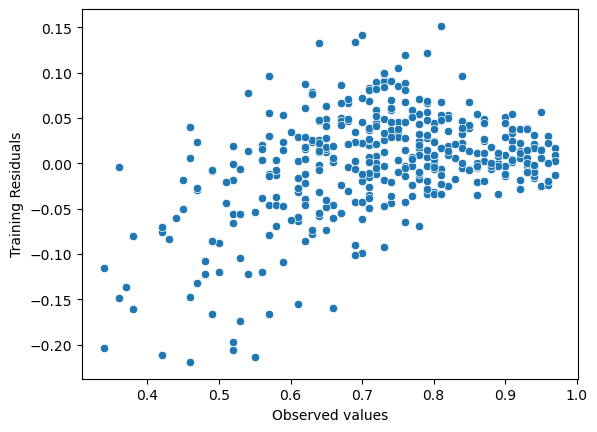

In [13]:
train_error=y_train-ypred_train

sns.scatterplot(x=y_train,y=train_error,data=df)
plt.xlabel('Observed values')
plt.ylabel('Training Residuals')
plt.show()

## Normality

In [14]:
train_error.skew()

-0.9842523186789336

In [15]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

In [16]:
from statsmodels.formula.api import ols

model_ols=ols('y_train~X_train',data=df_train).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          1.04e-139
Time:                        09:46:36   Log-Likelihood:                 553.12
No. Observations:                 400   AIC:                            -1092.
Df Residuals:                     393   BIC:                            -1064.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0024      0.073    -13.647      0.000      -1.147      -0.858
X_train[0]     0.0047      0.001      5.491      0.000       0.003       0.006
X_train[1]     0.0037      0.004      0.861      0.390      -0.005       0.012
X_train[2]     0.0012      0.005      0.224      0.823      -0.009       0.011
X_train[3]     0.0161      0.005      3.448      0.001       0.007       0.025
X_train[4]     0.1313      0.010     13.129      0.000       0.112       0.151
X_train[5]     0.0339      0.007      4.698      0.000       0.020       0.048
==============================================================================
Omnibus:                       77.650   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.254
Skew:                          -1.058   Prob(JB):                     2.36e-33
Kurtosis:                       5.130   Cond. No.                     2.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

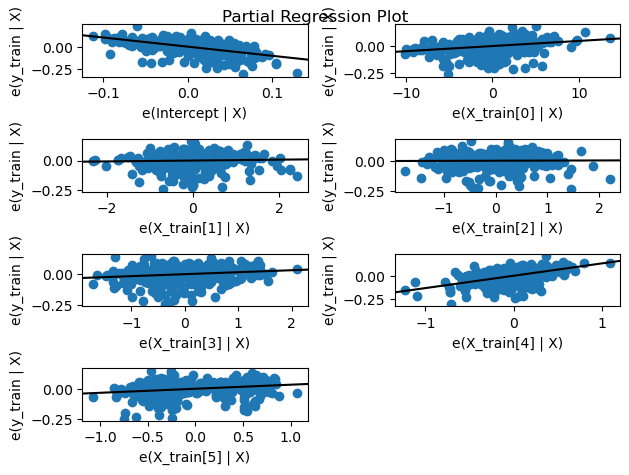

In [17]:
import statsmodels.api as sm

sm.graphics.plot_partregress_grid(model_ols)
plt.show()

## Remove SOP and re train

In [18]:
X.drop(columns='SOP',inplace=True)

### X and y

In [19]:
X

,TOEFL Score,University Rating,LOR,CGPA,Research
0,118,4,4.5,9.65,1
1,107,4,4.5,8.87,1
2,104,3,3.5,8.00,1
3,110,3,2.5,8.67,1
4,103,2,3.0,8.21,0
...,...,...,...,...,...
495,108,5,4.0,9.02,1
496,117,5,5.0,9.87,1
497,120,5,5.0,9.56,1
498,103,4,5.0,8.43,0


### train test split 

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Modelling with Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter= PolynomialFeatures(degree=2,include_bias=False)

x_train_poly_n = pd.DataFrame(polynomial_converter.fit_transform(X_train))

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fitting model on training data
model.fit(x_train_poly_n,y_train)

# Predicting train data
ypred_train= model.predict(x_train_poly_n)

# Evaluation of train data
from sklearn.metrics import r2_score
print('Train R2 score is ',r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print('Cross Validation score is ',cross_val_score(model,x_train_poly_n,y_train,cv=5).mean())

# Predicting test data

# First we must transform the X_test to polynomial degree used for training

x_test_poly_n=pd.DataFrame(polynomial_converter.transform(X_test))
ypred_test=model.predict(x_test_poly_n)

# Evaluation of test data

print('Test R2 score is ',r2_score(y_test,ypred_test))

Train R2 score is  0.821693506681153
Cross Validation score is  0.7991769138505533
Test R2 score is  0.8288209104621549


In [22]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
model_ols=ols('y_train~X_train',data=df_train).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     342.6
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          5.48e-141
Time:                        09:46:37   Log-Likelihood:                 553.10
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     394   BIC:                            -1070.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0068      0.071    -14.231      0.000      -1.146      -0.868
X_train[0]     0.0048      0.001      5.558      0.000       0.003       0.006
X_train[1]     0.0040      0.004      0.996      0.320      -0.004       0.012
X_train[2]     0.0164      0.004      3.690      0.000       0.008       0.025
X_train[3]     0.1318      0.010     13.462      0.000       0.113       0.151
X_train[4]     0.0339      0.007      4.705      0.000       0.020       0.048
==============================================================================
Omnibus:                       77.203   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.788
Skew:                          -1.054   Prob(JB):                     4.91e-33
Kurtosis:                       5.117   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remove University rating and rebuild

In [23]:
X.drop(columns='University Rating',inplace=True)

### X and y

In [24]:
X

,TOEFL Score,LOR,CGPA,Research
0,118,4.5,9.65,1
1,107,4.5,8.87,1
2,104,3.5,8.00,1
3,110,2.5,8.67,1
4,103,3.0,8.21,0
...,...,...,...,...
495,108,4.0,9.02,1
496,117,5.0,9.87,1
497,120,5.0,9.56,1
498,103,5.0,8.43,0


### train test split

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



## Modelling

In [26]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter= PolynomialFeatures(degree=2,include_bias=False)

x_train_poly_n = pd.DataFrame(polynomial_converter.fit_transform(X_train))

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fitting model on training data
model.fit(x_train_poly_n,y_train)

# Predicting train data
ypred_train= model.predict(x_train_poly_n)

# Evaluation of train data
from sklearn.metrics import r2_score
print('Train R2 score is ',r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print('Cross Validation score is ',cross_val_score(model,x_train_poly_n,y_train,cv=5).mean())

# Predicting test data

# First we must transform the X_test to polynomial degree used for training

x_test_poly_n=pd.DataFrame(polynomial_converter.transform(X_test))
ypred_test=model.predict(x_test_poly_n)

# Evaluation of test data

print('Test R2 score is ',r2_score(y_test,ypred_test))

Train R2 score is  0.8157608064903504
Cross Validation score is  0.7991765236350586
Test R2 score is  0.8236209806296534


In [27]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
model_ols=ols('y_train~X_train',data=df_train).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          4.07e-142
Time:                        09:46:37   Log-Likelihood:                 552.59
No. Observations:                 400   AIC:                            -1095.
Df Residuals:                     395   BIC:                            -1075.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0381      0.063    -16.378      0.000      -1.163      -0.913
X_train[0]     0.0049      0.001      5.855      0.000       0.003       0.007
X_train[1]     0.0177      0.004      4.139      0.000       0.009       0.026
X_train[2]     0.1343      0.009     14.196      0.000       0.116       0.153
X_train[3]     0.0347      0.007      4.854      0.000       0.021       0.049
==============================================================================
Omnibus:                       75.892   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.869
Skew:                          -1.042   Prob(JB):                     3.48e-32
Kurtosis:                       5.085   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumptions ( Failed)
### Linearity of Errors

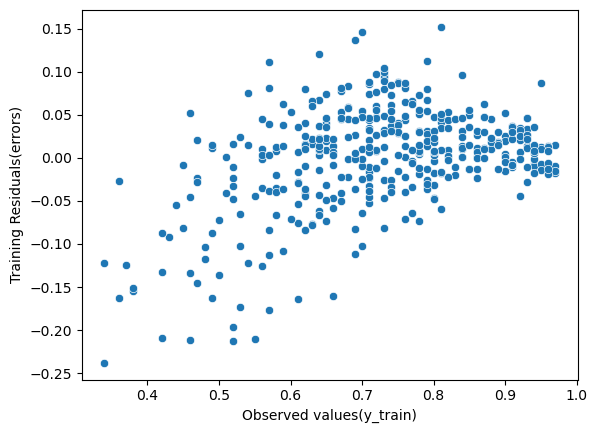

In [34]:
train_error=y_train-ypred_train

sns.scatterplot(y=train_error,x=y_train,data=df_train)
plt.xlabel('Observed values(y_train)')
plt.ylabel('Training Residuals(errors)')
plt.show()

### Normality of Errors

In [35]:
train_error.skew()

-1.0539031000041792

## Predict on future data

In [29]:
new_test={'GRE Score':307,'TOEFL Score':110, 'University Rating':4.5, 'SOP':3.5, 'LOR':4.0, 'CGPA':8.03,
       'Research':0}

new_df=pd.DataFrame(new_test,[0])
new_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,307,110,4.5,3.5,4.0,8.03,0


In [30]:
new_df.drop(['GRE Score','University Rating','SOP'],axis=1,inplace=True)

In [31]:
new_df_poly_n=pd.DataFrame(polynomial_converter.transform(new_df))

In [32]:
model.predict(new_df_poly_n).tolist()[0]*100

66.43717312073716

#### Accuracy is 82.36 BUT assumptions failed


# Lets try applying regularizations